<a href="https://colab.research.google.com/github/sanu1230/Academic-Project/blob/master/Logistic_Bank_term_deposit_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Term Deposit Subscription

## Business Requirement

**The dataset is from a bank, using which:**
- Find insights from data and make 
- Build Model to Predict whether the subject subscribes to a term deposit or not


**Attributes:**
The dataset has the following attributes:<br/>
1  - age (numeric)<br/>
2  - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services"). <br/>
3  - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br/>
4  - education (categorical: "unknown","secondary","primary","tertiary")<br/>
5  - default: has credit in default? (binary: "yes","no")<br/>
6  - balance: average yearly balance, in euros (numeric) <br/>
7  - housing: has housing loan? (binary: "yes","no")<br/>
8  - loan: has personal loan? (binary: "yes","no")<br/>
9  - contact: contact communication type (categorical: "unknown","telephone","cellular") <br/>
10 - day: last contact day of the month (numeric)<br/>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br/>
12 - duration: last contact duration, in seconds (numeric)<br/>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br/>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client      was not previously contacted)<br/>  
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br/>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br/>
**Response Variable (desired target):**<br/>
17 - y - has the client subscribed to a __term deposit?__ (binary: "yes","no")

**Importing packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
os.getcwd()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bank_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/UpX/ML Projects/bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Top 5 rows of dataset

**Let's see the datatypes of the variables**

In [ ]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


**Observations:** <br/>
No. of rows: 4521, No.of columns: 17
        

## Perform Descriptive Statistics on the dataset

**Descriptive statistics of numerical variables**

In [ ]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


**Observations:**Fortunately, there are no missing values.

## Remove missing values from the data frame if any

In [ ]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Let's see the how the numeric variables distributed

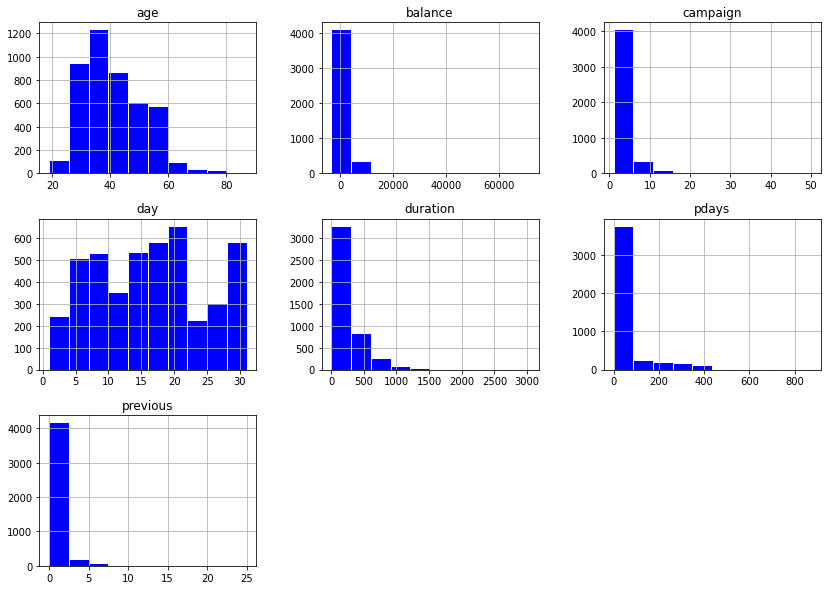

In [ ]:
import matplotlib.pyplot as plt
bank_data.hist(bins=10, figsize=(14,10), color='blue', edgecolor='white')
plt.show()

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome','day','month','y']
bank_data[encoding_list] = bank_data[encoding_list].apply(LabelEncoder().fit_transform)

In [ ]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,18,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,10,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,15,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,2,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,4,8,226,1,-1,0,3,0


**Target Variable**

In [ ]:
y = bank_data['y'].values
X = bank_data.drop('y',1)

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,18,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,10,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,15,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,2,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,4,8,226,1,-1,0,3


## Perform EDA and find any correlation

**Correlation**

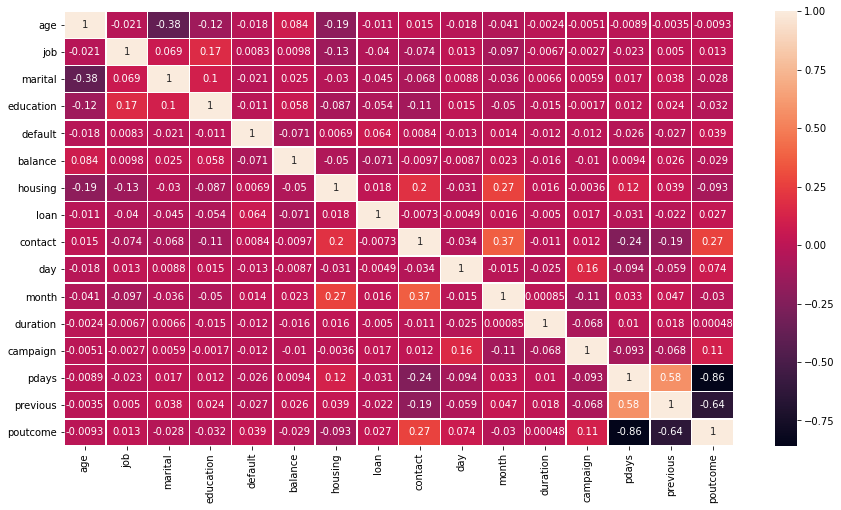

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, linewidth=0.5)
plt.show()

**Observations:** From the above graph, it is noted that pdays and previous are highly correlated to poutcome.

In [ ]:
del X['pdays']
del X['previous']

**Let's see some plots to understand the data**

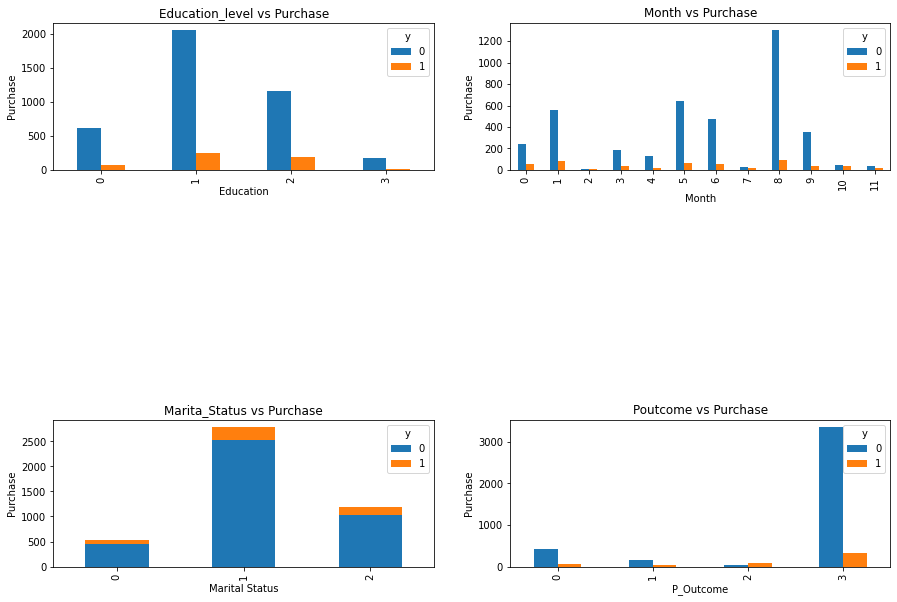

In [ ]:
#plots for education, marital, month, poutcome 
fig,ax = plt.subplots(2,2,figsize = (15,10))
plt.subplots_adjust(wspace= .2,hspace=1.7)
edu = pd.crosstab(bank_data['education'], bank_data['y'])
edu.plot(ax=ax[0,0],kind='bar')
ax[0,0].set_title('Education_level vs Purchase')
ax[0,0].set_xlabel("Education")
ax[0,0].set_ylabel("Purchase")

month = pd.crosstab(bank_data['month'],bank_data['y'])
month.plot(ax=ax[0,1],kind='bar')
ax[0,1].set_title('Month vs Purchase')
ax[0,1].set_xlabel("Month")
ax[0,1].set_ylabel("Purchase")

marital = pd.crosstab(bank_data['marital'],bank_data['y'])
marital.plot(ax=ax[1,0],kind='bar',stacked=True)
ax[1,0].set_title('Marita_Status vs Purchase')
ax[1,0].set_xlabel("Marital Status")
ax[1,0].set_ylabel("Purchase")

poutcome = pd.crosstab(bank_data['poutcome'],bank_data['y'])
poutcome.plot(ax=ax[1,1],kind='bar')
ax[1,1].set_title('Poutcome vs Purchase')
ax[1,1].set_xlabel("P_Outcome")
ax[1,1].set_ylabel("Purchase")
plt.show()

**Data Partition**

## Perform classification using Logistic Regression and analyse the metrics

In [ ]:
# Splitting Data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [ ]:
#Scaling Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)

X_test_norm = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

In [ ]:
#Logistice regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
logreg = LogisticRegression(max_iter=150)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Predictions**

In [ ]:
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

**Confustion Matrix**

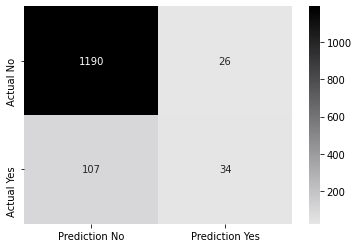

In [ ]:
con_met = metrics.confusion_matrix(y_test, y_pred_test)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(con_met, cmap=cmap, annot=True, fmt='d', xticklabels=['Prediction No', 'Prediction Yes'], yticklabels=['Actual No', 'Actual Yes'])

**Train and Test accuracy**

In [ ]:
print(metrics.accuracy_score(y_test, y_pred_test))#test accuracy
print(metrics.accuracy_score(y_train, y_pred_train))#train accuracy

0.9019896831245394
0.8852718078381795


**Classification report**

In [ ]:
cl=classification_report(y_test, y_pred_test)
print(cl)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1216
           1       0.57      0.24      0.34       141

    accuracy                           0.90      1357
   macro avg       0.74      0.61      0.64      1357
weighted avg       0.88      0.90      0.88      1357



In [ ]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

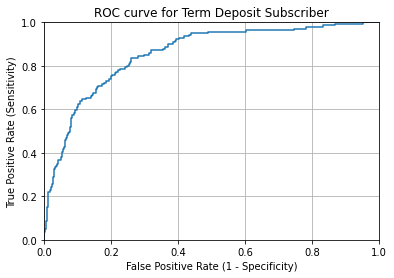

In [ ]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Term Deposit Subscriber')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## Result's not satisfying, Lets try again with Minmax scaled data

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,30,10,1,0,0,1787,0,0,0,18,10,79,1,3
1,33,7,1,1,0,4789,1,1,0,10,8,220,1,0
2,35,4,2,2,0,1350,1,0,0,15,0,185,1,0
3,30,4,1,2,0,1476,1,1,2,2,6,199,4,3
4,59,1,1,1,0,0,1,0,2,4,8,226,1,3


In [ ]:
#Split the data
from sklearn.model_selection import train_test_split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [ ]:
#Lets use MinMaxScaler and then re run the model

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

#fit the data to be scaled
Xm_train = sc.fit_transform(Xm_train)

Xm_test = sc.fit_transform(Xm_test)

Xm_train

array([[0.11764706, 0.72727273, 1.        , ..., 0.13494935, 0.        ,
        1.        ],
       [0.57352941, 0.54545455, 0.5       , ..., 0.00397974, 0.04651163,
        1.        ],
       [0.19117647, 0.        , 0.5       , ..., 0.07525326, 0.        ,
        0.        ],
       ...,
       [0.26470588, 0.        , 0.5       , ..., 0.04811867, 0.        ,
        1.        ],
       [0.39705882, 0.63636364, 0.5       , ..., 0.04667149, 0.06976744,
        1.        ],
       [0.29411765, 0.63636364, 0.5       , ..., 0.07091172, 0.02325581,
        1.        ]])

In [ ]:
max#Performing classification using logistic regression and analysing the mmetrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

logreg1 = LogisticRegression(max_iter=200)
logreg1.fit(Xm_train, ym_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#lets preditct bbased on model training
pred_y_test = logreg1.predict(Xm_test)
pred_y_train = logreg1.predict(Xm_train)

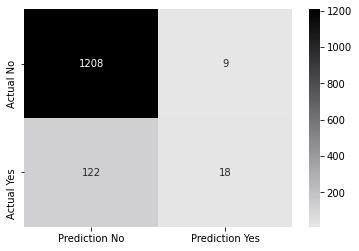

In [ ]:
#lets compare with confusion metrix
conf = metrics.confusion_matrix(ym_test, pred_y_test)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf, cmap = cmap, xticklabels=['Prediction No','Prediction Yes'], yticklabels=['Actual No','Actual Yes'], annot=True, fmt='d')

In [ ]:
#Lets check the accuracy percentage for both train and test pred
print('Test Accuracy: ', metrics.accuracy_score(ym_test, pred_y_test))
print('Train Accuracy: ', metrics.accuracy_score(ym_train, pred_y_train))

Test Accuracy:  0.9034635224760501
Train Accuracy:  0.8843236409608091


In [ ]:
#Classification Report
cl_re_test = classification_report(ym_test, pred_y_test)
print(cl_re_test)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1217
           1       0.67      0.13      0.22       140

    accuracy                           0.90      1357
   macro avg       0.79      0.56      0.58      1357
weighted avg       0.88      0.90      0.87      1357



In [ ]:
predict_probabilities = logreg1.predict_proba(Xm_test)
fpr, tpr, thresholds = metrics.roc_curve(ym_test, predict_probabilities[:,1])

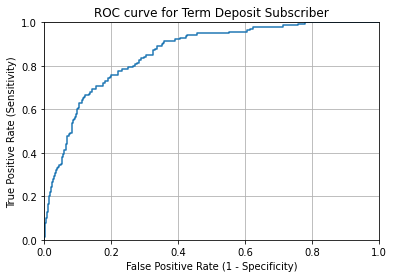

In [ ]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Term Deposit Subscriber')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)